In [7]:
# !pip install moviepy

In [4]:
video_file = 'soccer_CL.mp4'
output_audio_file = 'powerplay_audio_soccer.wav'

In [5]:
# Extract audio

import moviepy.editor as mp
clip = mp.VideoFileClip(video_file)
clip.audio.write_audiofile(output_audio_file)

MoviePy - Writing audio in powerplay_audio_soccer.wav


MoviePy - Done.


In [6]:
import librosa

# loading the file with a sampling rate
x, sr = librosa.load(output_audio_file, sr=16000)
# To get duration of the audio clip in minutes
print('Audio length: ', int(librosa.get_duration(x, sr) / 60))

Audio length:  118


In [7]:
# Dividing into chunks of 5 seconds 
max_slice = 5
window_length = max_slice * sr

In [8]:
# Playing the audio chunk
import IPython.display as ipd
a = x[21 * window_length:22 * window_length]
ipd.Audio(a, rate=sr)

In [10]:
energy = sum(abs(a**2))
print(energy)

2573.822434661328


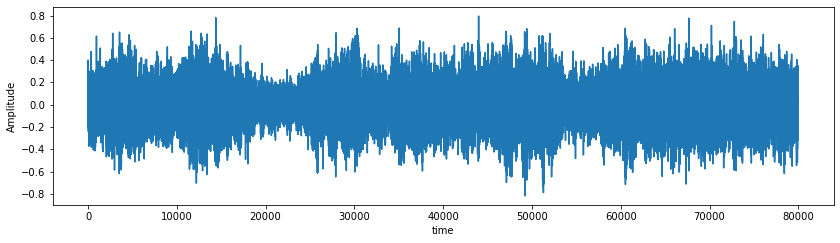

In [11]:
# Chunk in timeseries domain
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(a)

In [12]:
import numpy as np
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

In [13]:
len(energy), (len(x)/16000)/5

(1426, 1425.556)

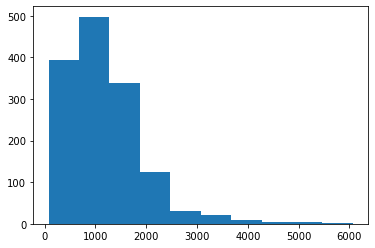

In [14]:
import matplotlib.pyplot as plt
plt.hist(energy)
plt.show()

In [15]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])

In [16]:
thresh=3500
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        l = df.shape[0]
        if(l == 0 or df.iloc[l-1]['end'] != i*5):
            df.loc[row_index,'energy']=value
            df.loc[row_index,'start']=i * 5
            df.loc[row_index,'end']=(i+1) * 5
            row_index= row_index + 1
        else:
             df.loc[l-1, 'end'] = (i+1)*5

In [17]:
df.shape

(11, 3)

In [18]:
df

,energy,start,end
0,3661,1710,1715
1,4859.15,2890,2895
2,4061.54,3450,3455
3,5069.82,3620,3650
4,6067.47,3880,3915
5,4025.73,3925,3940
6,3585.67,4015,4020
7,5029.51,4390,4400
8,3583.08,4430,4435
9,4156.1,5575,5580


In [19]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
    if(i!=0):
        start_lim = start[i] - 5
    else:
        start_lim = start[i] 
    end_lim   = end[i]   
    filename="clips/cut" + str(i+1) + ".mp4"
    ffmpeg_extract_subclip(video_file,start_lim,end_lim,targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [20]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
all_clips = []
for i in range(len(df)):
    all_clips += [VideoFileClip(f'clips/cut{str(i+1)}.mp4')]
final_clip = concatenate_videoclips(all_clips)
final_clip.write_videofile("Final_Highlights_soccer.mp4")

chunk:   0%|                                                                | 2/4163 [00:00<03:48, 18.18it/s, now=None]

Moviepy - Building video Final_Highlights_soccer.mp4.
MoviePy - Writing audio in Final_Highlights_soccerTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                    | 2/4720 [00:00<04:38, 16.95it/s, now=None]

MoviePy - Done.
Moviepy - Writing video Final_Highlights_soccer.mp4



Moviepy - Done !
Moviepy - video ready Final_Highlights_soccer.mp4
